# **Lab02: Asympototic Complexity**

- ### Your Name:
何家睿 Jiarui HE
- ### Your Student ID:
50013538

## Introduction

In this lab, you will develop a deeper understanding of **Asymptotic Complexity** through two programming exercises. We recommend that you ensure you have mastered **Python Basics** from the previous week and have a full understanding of the knowledge taught by Prof. Wang this week before starting the experiments.

When you decide to begin, it is crucial to read carefully and think logically before writing solution codes. **Reflecting on your thinking process and understanding** of the topic is more important than the final correct output results. And We encourage discussions, but Copying answers from other sources, including replacing variable names in existing answers and combining structures from different functions or methods, is strictly prohibited. It is important to note that any instances of plagiarism will have a direct impact on your final grade for this course.

### About this Lab

In this chapter, we have included some explicit tests to help you verify the correctness of your code implementation. You must ensure that your test output can be viewed in the version of the file you submit, and that they should be re-verifiable.

### Goal

1. Review what we learned in Python basics

2. Intuitively understand the concept of time complexity

3. Know how to use recursion to implement a given algorithm, and understand how to utilize recursion in algorithm design for a real problem.

### Environment

This lab requires the following packages:
* matplotlib

It is often recommended to use command `pip install matplotlib` to install them.
If you still have any problems installing your Python environment, please check the documentation [here](https://pypi.org/project/matplotlib/) or ask your teaching assistant for help during the Lab course.

## **Task 1. Modular exponentiation**

### Goal:

This Task implements two different simple advanced algorithm designs for a given task, mainly testing the following knowledge units:

- Recursive Functions

- Asymptotic analysis

You will understand the performance differences between different algorithm designs more intuitively.

### Questions:

Please design a function ***mod_exp(x, y, n)*** to implement:

- **Input**:  Integer $x$, $y$ and $n$, here $x>0$, $y>=0$, $n>1$;

- **Output**:  $x^y(\bmod~n)$;


// *Note 1:*

 **Modulus**, denoted as the % symbol in Python programming languages, is a mathematical operator used to find the remainder of a division operation. In simple terms, it calculates what is left over after dividing one number by another.

For example, if we divide 10 by 3, the quotient is 3 with a remainder of 1. The modulus operation would return this remainder, which is 1.

// *Note 2:*

 **Modular exponentiation** is the remainder when an integer $x$ (the base) is raised to the power $y$ (the exponent), and divided by a positive integer $n$ (the modulus); that is, $m = x^y \bmod n$. From the definition of division, it follows that $0 ≤ m < n$.

For example, given $x = 5$, $y = 3$ and $n = 13$, dividing $5^3 = 125$ by $13$ leaves a remainder of $m = 8$.


### Algorthms

#### Direct method (Baseline)

The most direct method of calculating a modular exponent is to calculate $x^y$ directly, then to take this number modulo $n$.

The following is its concise code implementation in python:

In [35]:
# Please read and try the next code block first, and then think about why the correct results can not be displayed 
# Code implementation of Direct method

def mod_exp_01(x, y, n):
    result = 1
    
    for i in range(y):
        result *= x

    return result % n


# test Code

x, y, n = 1024e100, 1080, 4

result_01 = mod_exp_01(x, y, n)
print(f"x^y(mod n)={result_01}")

x^y(mod n)=nan


I hope you have guessed the crux of the problem in the direct method: When we want to calculate the modular exponentiation of a huge value, for the computer, this value is far beyond the data range defined by the program. Therefore, it is relatively difficult to display it under the default settings.

But what can we do to reduce the size of terms involved to improve it?

Let's give you a simpler example to help you understand it better:

Suppose we have $x=2$, $y=90$, $n=13$;

Here is a simple **divide and conquer** strategy:

- First, following the above identities, we would like to **divide the problem into some smaller parts** by exponent rules;

- Then, for each part, we find the module separately;

- Finally, we **combine those parts** through the multiplication properties and get the final result.

The whole solving process:

Step 1. $2^{90} \bmod 13 = ( 2^{50} \times 2^{40} ) \bmod 13$

Step 2. $2^{90} \bmod 13 = ( 2^{50} \bmod 13 \times 2^{40} \bmod 13) \bmod 13$

Step 3. $2^{90} \bmod 13 = ( 4 \times 3 ) \bmod 13$

Step 4. $2^{90} \bmod 13 = 12 \bmod 13$

Step 5. $2^{90} \bmod 13 = 12$

#### Memory-efficient method **(Code Implementation 01)**

Follow the idea above, we can easily think back to our problem:

For $x, y < n$, the modulo exponent $x^y(\bmod~n)$ follows the definition of integer power: x multiplies itself y times, but modulo n

- $x^{y}(\mathrm{mod~}n)=\underbrace{xx\cdots x}_{y}(\mathrm{mod~}n)$

This algorithm makes use of the identity:

Here, $a$, $b$, $c$ are all positive integers, and $c>1$

- $(a\cdot b)\bmod c=[(a\bmod c)\cdot(b\bmod c)]\bmod c$


The core idea of Memory-efficient method is that **keeping the numbers smaller** requires **additional modular reduction operations**, but the reduced size makes each operation faster, saving time (as well as memory) overall.

We can divide it into the smallest unit: int $x$, and then use the given identity to calculate the modulo of every 'unit' and iteratively multiplicate them in a loop. Finally return the result.

Here please implement the function by yourself, and observe whether the problem is solved just by changing the algorithm.

In [48]:
# This function calculates (x^y) % n using the property of modular exponentiation
# Code implementation of Memory-efficient method

def mod_exp_02(x, y, n):
    if y == 0 : return 1
    elif y == 1 : return x % n
    else: return mod_exp_02(x, y // 2, n) * mod_exp_02(x, y // 2 + y % 2, n) % n

# test Code

x, y, n = 2, 100, 13

result_02 = mod_exp_02(x, y, n)
print(f"x^y(mod n)={result_02}")

KeyboardInterrupt: 

#### Fast modular exponentiation **(Code Implementation 02)**

In most modern high performance computers, we usually need to consider more the time complexity of the designed algorithm rather than just the memory usage, since the time spent calculating and processing data is obviously more important than the cost of adding some memory sticks to the computer.

Based on Memory-efficient method, can we increase some memory usage within a reasonable range to speed up the calculation process?

The answer is yes!

In fact, we can design the Memory-efficient algorithm to be more "adaptive" (adapting to computer/program limitations) based on the idea of divide and conquer. We call it Fast modular exponentiation.

First, let us use the following program to get the range of float numbers in the python program：

In [37]:
# Code to get the float_info in the python running on your computer (which may be a 32-bit or 64-bit architecture)

import sys

print(sys.float_info)

print(x * x)

print(x * x * x)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)
4
8


As you can see, actually the range of float numbers that a Python program can express is much larger than the result of combining our two to three "minimal units" through multiplication.

So I believe that by now you already feel that the algorithm we want to implement is ready to come out. Here we might as well use the binary method to give an example of how our algorithm works：

Let's get back to our problem, **How can we calculate $x^y \bmod n$ quickly?**

Assume that we have $x=5$, $y=117$, $n=19$, i.e. $5^{117} \bmod 19$

*(For the case where y is an even number, it is simpler)*

- Step 1: **Divide $y$** into powers of 2 by writing it in binary

- Step 2: Calculate $mod~n$ of the powers of 2 ≤ $y$

- Step 3: Use modular multiplication properties to **combine the calculated $mod~n$ values**

The whole solving process:

- ***Step 1***

    $117=1110101$ in binary

    Start at the rightmost digit, let k=0 and for each digit:

    - If the digit is 1, we need a part for 2^k, otherwise we do not
    
    - Add 1 to k, and move left to the next digit

    $117=(2^{0}+2^{2}+2^{4}+2^{5}+2^{6})$

    $117=1+4+16+32+64$

    $5^{117}\bmod 19=5^{(1+4+16+32+64)}\bmod 19$

    $5^{117}\mathrm{~mod~}19=(5^{1}*5^{4}*5^{16}*5^{32}*5^{64})\mathrm{~mod~}19$

- ***Step 2***

    //

    $5^1\bmod 19 = 5$

    //

    $5^2\bmod 19 = (5^1 * 5^1)\bmod 19 = (5^1\bmod 19 * 5^1\bmod 19)\bmod 19$

    $5^2\bmod 19 = (5 * 5)\bmod 19 = 25\bmod 19$

    $5^2\bmod 19 = 6$

    //

    $5^4\bmod 19 = (5^2 * 5^2)\bmod 19 = (5^2\bmod 19 * 5^2\bmod 19)\bmod 19$

    $5^4\bmod 19 = (6 * 6)\bmod 19 = 36\bmod 19$

    $5^4\bmod 19 = 17$

    //

    $5^8\bmod 19 = (5^4 * 5^4)\bmod 19 = (5^4\bmod 19 * 5^4\bmod 19)\bmod 19$

    $5^8\bmod 19 = (17 * 17)\bmod 19 = 289\bmod 19$

    $5^8\bmod 19 = 4$

    //

    $5^{16}\bmod 19 = (5^8 * 5^8)\bmod 19 = (5^8\bmod 19 * 5^8\bmod 19)\bmod 19$

    $5^{16}\bmod 19 = (4 * 4)\bmod 19 = 16\bmod 19$

    $5^{16}\bmod 19 = 16$

    //

    $5^{32}\bmod 19 = (5^{16} * 5^{16})\bmod 19 = (5^{16}\bmod 19 * 5^{16}\bmod 19)\bmod 19$

    $5^{32}\bmod 19 = (16 * 16)\bmod 19 = 256\bmod 19$

    $5^{32}\bmod 19 = 9$

    //

    $5^{64}\bmod 19 = (5^{32} * 5^{32})\bmod 19 = (5^{32}\bmod 19 * 5^{32}\bmod 19)\bmod 19$

    $5^{64}\bmod 19 = (9 * 9)\bmod 19 = 81\bmod 19$
    
    $5^{64}\bmod 19 = 5$

    //

- Step 3

    $5^{117}\bmod 19 = ( 5^1 * 5^4 * 5^{16} * 5^{32} * 5^{64})\bmod 19$

    $5^{117}\bmod 19 = ( 5^1\bmod 19 * 5^4\bmod 19 * 5^{16}\bmod 19 * 5^{32}\bmod 19 * 5^{64}\bmod 19)\bmod 19$

    $5^{117}\bmod 19 = ( 5 * 17 * 16 * 9 * 5 )\bmod 19$

    $5^{117}\bmod 19 = 61200\bmod 19 = 1$
    
    $5^{117}\bmod 19 = 1$

Now do you realize how simple and effective the divide-and-conquer algorithm is?

Then it's your turn. Please use recursive methods to implement the modular exponential calculation of any $y$ in a similar $binary$ divide and conquer scenario.

Tips: All the key points have been mentioned in the example above, you just need to implement it by the recursion.

In [38]:
# This function calculates (x^y) % n by the resursive function, also using the property of modular exponentiation
# Code implementation of Fast modular exponentiation

def mod_exp_03(x, y, n):
    res = 1
    while y > 0:
        if y % 2 == 1 : res = res * x % n
        x = x * x % n
        y //= 2
    return res


# test Code

x, y, n = 2, 90, 13

result_03 = mod_exp_03(x, y, n)
print(f"x^y(mod n)={result_03}")

x^y(mod n)=12


#### Comparison

Here we will use some Python auxiliary tools and visual charts to help us intuitively understand the differences in memory usage and time cost between these algorithms.

##### Memory Cost

We use a tool called **tracemalloc**, which is supported by default in some newer versions of python3, to analyze the memory usage inside the program. If you are interested in this advanced analysis tool, you can check out <https://docs.python.org/3/library/tracemalloc.html> for more information.

The following analysis process requires you to fill in the program, which has passed the previous test, into the corresponding position, and then run the code block.

```python
# Memory cost analysis
# Here you can just put it into a python file (it will be given), and run it in your command line to test

# the command may be needed: python3 memory.py

import tracemalloc

tracemalloc.start()

# Code implementation of Direct method
def mod_exp_01(x, y, n):
    result = 1
    
    for i in range(y):
        result *= x

    return result % n

# Code implementation of Memory-efficient method
def mod_exp_02(x, y, n):
    # TODO

# Code implementation of Fast modular exponentiation
def mod_exp_03(x, y, n):
    # TODO

        
x, y, n = 343e10, 1080, 6

result_01 = mod_exp_01(x, y, n)
print(f"x^y(mod n)={result_01}\n")

result_02 = mod_exp_02(x, y, n)
print(f"x^y(mod n)={result_02}\n")

result_03 = mod_exp_03(x, y, n)
print(f"x^y(mod n)={result_03}\n")

snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.statistics("lineno")

for line in top_stats[:40]:
    print(line)
```

##### Time Cost

We record the time costs corresponding to y of different input sizes and make images of the changing relationships between them to intuitively judge the relationship between them.

Note: Please ensure that your program has enough memory space to run during this test. This test may take a long time, you can make a cup of coffee and wait patiently for the results. The final result may be somewhat different from our ideal "smooth curve". Don't worry, this is the problem of the python interpreter itself and also may be caused by the internal computer performance optimization. You just need to be responsible for observing the final result and having an intuitive understanding in this part.

Please fill in the function code that has been implemented previously and run it according to the given test. If you find that the load of the program has exceeded the capacity of your computer, you can try to change the marked parts of the given code and make a new attempt.

In [39]:
# Import the required pkgs
import time
import matplotlib.pyplot as plt

In [40]:
# A timer class can help you record the running time of your code
class Timer:
  
  def __init__(self):
    self.begin_time = 0
    self.end_time = 0
    self.time_counting_list = []

  def Beginning(self):
    self.begin_time = time.time()

  def Ending(self):
    self.end_time = time.time()

  def Time_Counter(self):
    self.end_time = time.time()
    time_counts = self.end_time - self.begin_time
    print("The time cost is {}".format(time_counts))
    self.time_counting_list.append(time_counts)
    return time_counts

  def Time_records(self):
    tmp_list = self.time_counting_list
    self.time_counting_list = []
    return tmp_list


In [41]:
# A plot class, which represent us the qualitative relationship between the input size of your data and the time cost of model classifying
class Plot_Complexity:

  def __init__(self, x_array):
    self.x_array = x_array

  def Plot_data_time(self, y_array_list):
    plt.figure(figsize=(10, 8), dpi=72)

    for i in range(len(y_array_list)):
      plt.plot(self.x_array, y_array_list[i], alpha = 0.2)

    plt.xlabel('Input size')
    plt.ylabel('Time cost')
    plt.legend()

  def Plot_data_show(self):
    plt.show()
    plt.close()

  def Plot_data_avg(self, y_array_list):
    y_avg_list = []

    for i in range(len(y_array_list[0])):
      y_total_row = [x[i] for x in y_array_list]
      y_avg = sum(y_total_row)/len(y_total_row)
      y_avg_list.append(y_avg)

    plt.plot(self.x_array, y_avg_list, label='Avg_time_cost')
    plt.xlabel('Input size')
    plt.ylabel('Time cost')
    plt.legend()

In [42]:
# Code implementation of Direct method
def mod_exp_01(x, y, n):
    result = 1
    
    for i in range(y):
        result *= x

    return result % n

# Code implementation of Memory-efficient method
def mod_exp_02(x, y, n):
    time.sleep(0.001)   # Don't remove it, because it will make your result more stable

    # Paste your Code below
    # TODO

# Code implementation of Fast modular exponentiation
def mod_exp_03(x, y, n):
    time.sleep(0.001)   # Don't remove it, because it will make your result more stable

    # Paste your Code below
    # TODO

Beginning Testing 01
Instance_0:
The time cost is 0.0011577606201171875
The time cost is 0.0012960433959960938
The time cost is 0.0012009143829345703
The time cost is 0.0012788772583007812
The time cost is 0.0012969970703125
The time cost is 0.0013270378112792969
The time cost is 0.0013518333435058594
The time cost is 0.0012819766998291016
The time cost is 0.0012981891632080078
The time cost is 0.0013248920440673828
The time cost is 0.0012960433959960938
The time cost is 0.0012769699096679688
The time cost is 0.0012979507446289062
The time cost is 0.0010688304901123047
The time cost is 0.001332998275756836
The time cost is 0.0011470317840576172
The time cost is 0.0011990070343017578
The time cost is 0.0012941360473632812
The time cost is 0.0012810230255126953
The time cost is 0.0012841224670410156
The time cost is 0.0012819766998291016
The time cost is 0.0013489723205566406
The time cost is 0.0012938976287841797
The time cost is 0.001275777816772461
The time cost is 0.00109195709228515

The time cost is 0.0011477470397949219
The time cost is 0.0013117790222167969
The time cost is 0.0010559558868408203
The time cost is 0.0012691020965576172
The time cost is 0.0011968612670898438
The time cost is 0.0012941360473632812
The time cost is 0.001322031021118164
The time cost is 0.0012710094451904297
The time cost is 0.0010230541229248047
The time cost is 0.0010828971862792969
The time cost is 0.001074075698852539
The time cost is 0.0011432170867919922
The time cost is 0.0012352466583251953
The time cost is 0.0010671615600585938
The time cost is 0.001354217529296875
The time cost is 0.0012400150299072266
The time cost is 0.0011639595031738281
The time cost is 0.0013530254364013672
The time cost is 0.0013651847839355469
The time cost is 0.001316070556640625
The time cost is 0.0013091564178466797
The time cost is 0.0013136863708496094
The time cost is 0.0010747909545898438
The time cost is 0.0021712779998779297
The time cost is 0.003591775894165039
The time cost is 0.00435495376

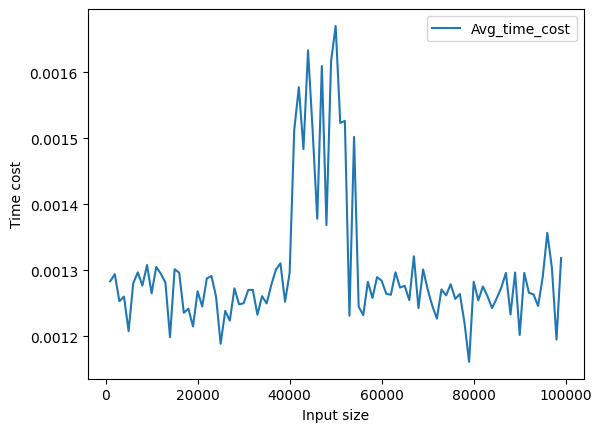

Ending Testing 01


In [43]:
# Test Code 01

print("Beginning Testing 01")

# Initialization
instances_num = 10     # The instances number in the final plot
Interval = range(1000, 100000, 1000)
# You can adjust them to numbers between two integer ranges whose magnitude differs by 100, and observe different part of the performance of two different algorithm
# It is recommended that the number of samples should be kept around 100 times (actually you delete the same number of zeros in three numbers at the same time), otherwise you may wait a long time to get the final result

# Register necessary ploter
Plot = Plot_Complexity(Interval)

# Register necessary monitor
time_counter = Timer()

time_list_01 = []

for ins in range(instances_num):

  print("Instance_{}:".format(ins))

  for i in Interval:

    time_counter.Beginning()

    # time.sleep(0.0002)      # Prevent programs from running too fast
    a = mod_exp_03(int(343e20), i, 6)    # test input

    time_counter.Time_Counter()
  
  time_list0 = time_counter.Time_records()

  time_list_01.append(time_list0)

# Plot the final results

Plot.Plot_data_avg(time_list_01)

Plot.Plot_data_show()

print("Ending Testing 01")

Beginning Testing 02
Instance_0:
The time cost is 0.0012772083282470703
The time cost is 0.0010728836059570312
The time cost is 0.0012781620025634766
The time cost is 0.001238107681274414
The time cost is 0.0012888908386230469
The time cost is 0.0012669563293457031
The time cost is 0.0011169910430908203
The time cost is 0.0011639595031738281
The time cost is 0.0011110305786132812
The time cost is 0.0010960102081298828
The time cost is 0.001277923583984375
The time cost is 0.0010459423065185547
The time cost is 0.0010480880737304688
The time cost is 0.0010790824890136719
The time cost is 0.0011060237884521484
The time cost is 0.001277923583984375
The time cost is 0.0010380744934082031
The time cost is 0.0012679100036621094
The time cost is 0.0012710094451904297
The time cost is 0.0010941028594970703
The time cost is 0.0011980533599853516
The time cost is 0.001280069351196289
The time cost is 0.0010640621185302734
The time cost is 0.001168966293334961
The time cost is 0.00106692314147949

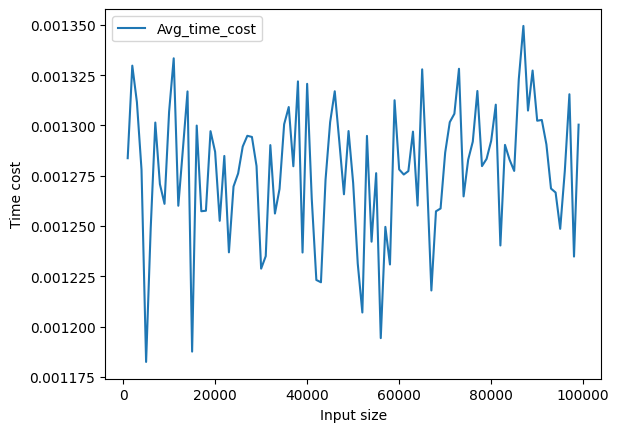

Ending Testing 02


In [44]:
# Test Code 02

print("Beginning Testing 02")

# Initialization
instances_num = 10     # The instances number in the final plot
Interval = range(1000, 100000, 1000)
# You can adjust them to numbers between two integer ranges whose magnitude differs by 100, and observe different part of the performance of two different algorithm
# It is recommended that the number of samples should be kept around 100 times (actually you delete the same number of zeros in three numbers at the same time), otherwise you may wait a long time to get the final result

# Register necessary ploter
Plot = Plot_Complexity(Interval)

# Register necessary monitor
time_counter = Timer()

time_list_02 = []

for ins in range(instances_num):

  print("Instance_{}:".format(ins))

  # Register necessary monitor

  for i in Interval:

    time_counter.Beginning()

    # time.sleep(0.0002)      # Prevent programs from running too fast
    a = mod_exp_02(int(343e20), i, 6)    # test input

    time_counter.Time_Counter()
  
  time_list1 = time_counter.Time_records()

  time_list_02.append(time_list1)

# Plot the final results

Plot.Plot_data_avg(time_list_02)

Plot.Plot_data_show()

print("Ending Testing 02")

***Note: The final average result of test code 1 or 2 will look "fluctuating", but consider its "smooth" performance within the given range of input size changes.***

Beginning Testing 03
Beginning
Instance_0:
The time cost is 0.0010743141174316406
The time cost is 0.0011751651763916016
The time cost is 0.0012259483337402344
The time cost is 0.001271963119506836
The time cost is 0.001071929931640625
The time cost is 0.001077890396118164
The time cost is 0.0012652873992919922
The time cost is 0.001180887222290039
The time cost is 0.0011830329895019531
The time cost is 0.0011668205261230469
The time cost is 0.001275777816772461
The time cost is 0.0011289119720458984
The time cost is 0.0011277198791503906
The time cost is 0.0012691020965576172
The time cost is 0.0010647773742675781
The time cost is 0.001280069351196289
The time cost is 0.0012669563293457031
The time cost is 0.0010499954223632812
The time cost is 0.0010650157928466797
The time cost is 0.0012731552124023438
The time cost is 0.0012669563293457031
The time cost is 0.001271963119506836
The time cost is 0.0010409355163574219
The time cost is 0.0012359619140625
The time cost is 0.001264810562

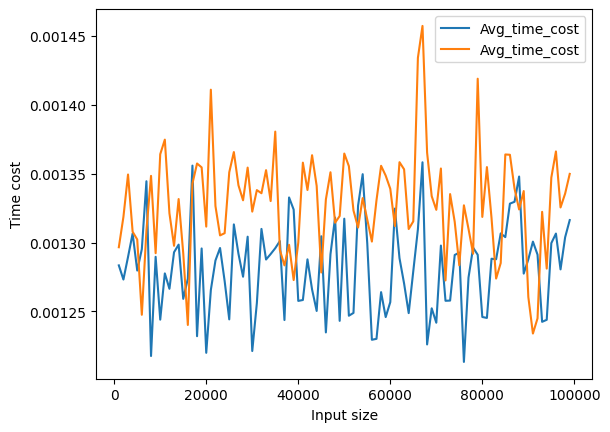

Ending Testing 03


In [45]:
# Test Code 03

print("Beginning Testing 03")

print("Beginning")

# Initialization
instances_num = 10     # The instances number in the final plot
Interval = range(1000, 100000, 1000)     # You can change the range following the given rules above and see the performance in different range of input size.

# Register necessary ploter
Plot = Plot_Complexity(Interval)

# Register necessary monitor
time_counter = Timer()

time_list_01 = []

for ins in range(instances_num):

  print("Instance_{}:".format(ins))

  for i in Interval:

    time_counter.Beginning()

    # time.sleep(0.0002)      # Prevent programs from running too fast
    a = mod_exp_03(int(343e20), i, 6)    # test input

    time_counter.Time_Counter()
  
  time_list0 = time_counter.Time_records()

  time_list_01.append(time_list0)

# Plot the final results

Plot.Plot_data_avg(time_list_01)


time_list_02 = []

for ins in range(instances_num):

  print("Instance_{}:".format(ins))

  # Register necessary monitor

  for i in Interval:

    time_counter.Beginning()

    # time.sleep(0.0002)      # Prevent programs from running too fast
    a = mod_exp_02(int(343e20), i, 6)    # test input

    time_counter.Time_Counter()
  
  time_list1 = time_counter.Time_records()

  time_list_02.append(time_list1)

# Plot the final results

Plot.Plot_data_avg(time_list_02)

Plot.Plot_data_show()

print("Ending Testing 03")

Beginning Testing 04
Beginning
Instance_0:
The time cost is 0.0012748241424560547
The time cost is 0.0010821819305419922
The time cost is 0.0012378692626953125
The time cost is 0.0012650489807128906
The time cost is 0.0012898445129394531
The time cost is 0.0012700557708740234
The time cost is 0.001093149185180664
The time cost is 0.0010771751403808594
The time cost is 0.0010938644409179688
The time cost is 0.0012669563293457031
The time cost is 0.0012669563293457031
The time cost is 0.0011491775512695312
The time cost is 0.0012660026550292969
The time cost is 0.0011048316955566406
The time cost is 0.0012679100036621094
The time cost is 0.0012638568878173828
The time cost is 0.001056671142578125
The time cost is 0.0011310577392578125
The time cost is 0.0012679100036621094
The time cost is 0.0012631416320800781
The time cost is 0.0012629032135009766
The time cost is 0.0010502338409423828
The time cost is 0.0012857913970947266
The time cost is 0.0010459423065185547
The time cost is 0.0012

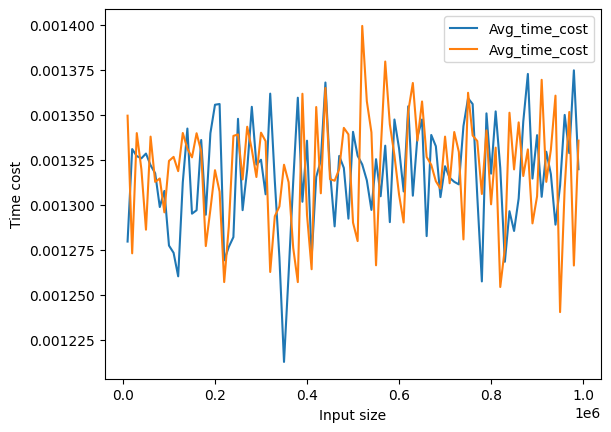

Ending Testing 04


In [46]:
# Test Code 04

print("Beginning Testing 04")

print("Beginning")

# Initialization
instances_num = 10     # The instances number in the final plot
Interval = range(10000, 1000000, 10000)     # Here the range of input size has been changed (mutiply 10), and observe the curve trend along with the axis of input size

# Register necessary ploter
Plot = Plot_Complexity(Interval)

# Register necessary monitor
time_counter = Timer()

time_list_01 = []

for ins in range(instances_num):

  print("Instance_{}:".format(ins))

  for i in Interval:

    time_counter.Beginning()

    # time.sleep(0.0002)      # Prevent programs from running too fast
    a = mod_exp_03(int(343e20), i, 6)    # test input

    time_counter.Time_Counter()
  
  time_list0 = time_counter.Time_records()

  time_list_01.append(time_list0)

# Plot the final results

Plot.Plot_data_avg(time_list_01)


time_list_02 = []

for ins in range(instances_num):

  print("Instance_{}:".format(ins))

  # Register necessary monitor

  for i in Interval:

    time_counter.Beginning()

    # time.sleep(0.0002)      # Prevent programs from running too fast
    a = mod_exp_02(int(343e20), i, 6)    # test input

    time_counter.Time_Counter()
  
  time_list1 = time_counter.Time_records()

  time_list_02.append(time_list1)

# Plot the final results

Plot.Plot_data_avg(time_list_02)

Plot.Plot_data_show()

print("Ending Testing 04")

Beginning Testing 05
Beginning
Instance_0:
The time cost is 0.0012819766998291016
The time cost is 0.001191854476928711
The time cost is 0.0012781620025634766
The time cost is 0.0012810230255126953
The time cost is 0.0012729167938232422
The time cost is 0.0012810230255126953
The time cost is 0.0012879371643066406
The time cost is 0.0010540485382080078
The time cost is 0.0012187957763671875
The time cost is 0.0012691020965576172
The time cost is 0.0011110305786132812
The time cost is 0.0012769699096679688
The time cost is 0.001096963882446289
The time cost is 0.0012700557708740234
The time cost is 0.0010728836059570312
The time cost is 0.0010879039764404297
The time cost is 0.0012679100036621094
The time cost is 0.0010333061218261719
The time cost is 0.0012652873992919922
The time cost is 0.0012679100036621094
The time cost is 0.0012657642364501953
The time cost is 0.0012161731719970703
The time cost is 0.0012407302856445312
The time cost is 0.0012831687927246094
The time cost is 0.0012

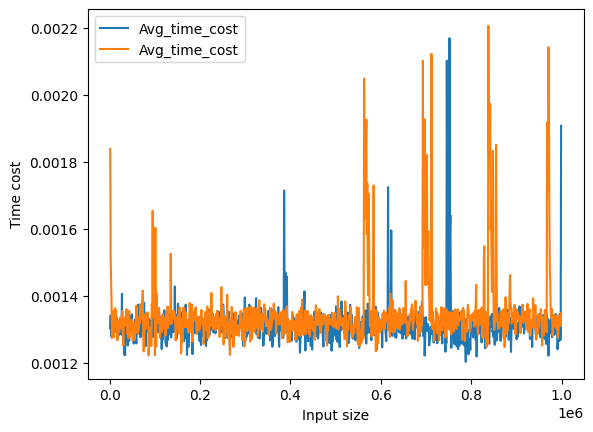

Ending Testing 05


In [47]:
# Test Code 05
# This code is just a slower version for the combination of two ranges of input size above, its result will be not included in your final grades.
# Just make a cup of coffee and you can verify your assumption based on your observation above. 

print("Beginning Testing 05")

print("Beginning")

# Initialization
instances_num = 10     # The instances number in the final plot
Interval = range(1000, 1000000, 1000)     # Here the range of input size has been changed again (add the above two together and adjust the sample rate), and how the two curves are "combined" should be observed

# Register necessary ploter
Plot = Plot_Complexity(Interval)

# Register necessary monitor
time_counter = Timer()

time_list_01 = []
ans03, ans02 = [], []

for ins in range(instances_num):

  print("Instance_{}:".format(ins))

  for i in Interval:

    time_counter.Beginning()

    # time.sleep(0.0002)      # Prevent programs from running too fast
    ans03.append(mod_exp_03(int(343e20), i, 6))    # test input

    time_counter.Time_Counter()
  
  time_list0 = time_counter.Time_records()

  time_list_01.append(time_list0)

# Plot the final results

Plot.Plot_data_avg(time_list_01)


time_list_02 = []

for ins in range(instances_num):

  print("Instance_{}:".format(ins))

  # Register necessary monitor

  for i in Interval:

    time_counter.Beginning()

    # time.sleep(0.0002)      # Prevent programs from running too fast
    ans02.append(mod_exp_02(int(343e20), i, 6))    # test input

    time_counter.Time_Counter()
  
  time_list1 = time_counter.Time_records()

  time_list_02.append(time_list1)

# Plot the final results

Plot.Plot_data_avg(time_list_02)

Plot.Plot_data_show()

print("Ending Testing 05")

if ans02 != ans03:
  print("Wrong Answer...")

Note: If solving instances within the above data range is still too slow for your computer, please follow the instructions given in the code to change the variable called ***Interval***'s value range(min-max value) and step size;

if you still have problems, please check your function carefully. Is there any problem with the design? please fix them according to the provided class and function code.

### Questions

Based on the above experimental results and analysis using the knowledge you have learned in the previous two weeks,

**please answer the following questions:**

(Delete the question mark in its original position and answer directly)

1. For the direct method, it requires $O(y)$ multiplications to complete;

2. For the Memory-efficient method method, it requires $O(y)$ multiplications to complete;

3. For the fast modular exponentiation method, The running time of this algorithm is $O(\log_2 y)$. *(Rigorous analysis results can be obtained using the methods we have learned, but as you can see, the differences between them are very obvious, and you can boldly guess your answer here.)*

**Which method takes up the most memory? *(You can delete the wrong answers directly)*** ***(No Points here)***

- Direct method/Memory-efficient method/Fast modular exponentiation method

**Which method has the lowest time complexity？*(You can delete the wrong answers directly)***

- Fast modular exponentiation method

## Grading Policy

The grades of this is lab is composed of:
* Submission: 50%
* Task1: 50%
  * Code implementation 01: 15%
  * Code implementation 02: 20%
  * Comparison: 5%
    * Memory: 0%
    * Plot(Test 1 and 2): 2%
    * Plot(Test 3 and 4): 3%
  * Questions: 10%